In [ ]:
# =============================================================================
# FEATURE ENGINEERING: CREATION & SELECTION
# For Crop Yield Prediction Project
# Dataset: Crop Yield Dataset by Sparsh
# Source: https://www.kaggle.com/datasets/sparshx/crop-yeild-dataset/data
# =============================================================================

# ----------------------------
# 1. IMPORT NECESSARY LIBRARIES
# ----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Table= pd.read_csv('/content/crop_yeild_dataset.csv')

In [ ]:
Table.head(10000)

,crop,region,N,P,K,temperature,humidity,rainfall,ph,area_ha,production_t
0,rice,Karnataka,70.7,43.6,54.9,27.2,61.2,255.9,6.95,268,928.2
1,rice,Punjab,108.8,46.9,43.4,25.5,58.7,87.0,7.08,605,2213.1
2,maize,West Bengal,91.9,34.7,30.4,27.5,73.5,349.9,5.99,410,2409.2
3,rice,Maharashtra,120.0,51.6,64.3,30.4,44.2,3.7,7.20,986,2303.9
4,sugarcane,Maharashtra,164.8,57.0,173.0,24.0,39.5,43.0,6.81,941,77299.3
...,...,...,...,...,...,...,...,...,...,...,...
9995,cotton,Punjab,66.8,46.8,60.0,27.4,80.9,36.3,7.31,528,1057.8
9996,wheat,Karnataka,118.7,62.7,31.3,32.8,84.5,69.7,5.83,501,1421.8
9997,sugarcane,Maharashtra,146.7,51.3,194.3,42.6,54.3,21.2,7.26,114,9566.8
9998,rice,Punjab,90.1,52.7,67.9,26.2,26.7,33.4,7.48,663,1670.3


Dataset Shape: (250000, 11)

First 5 rows:


,crop,region,N,P,K,temperature,humidity,rainfall,ph,area_ha,production_t
0,rice,Karnataka,70.7,43.6,54.9,27.2,61.2,255.9,6.95,268,928.2
1,rice,Punjab,108.8,46.9,43.4,25.5,58.7,87.0,7.08,605,2213.1
2,maize,West Bengal,91.9,34.7,30.4,27.5,73.5,349.9,5.99,410,2409.2
3,rice,Maharashtra,120.0,51.6,64.3,30.4,44.2,3.7,7.20,986,2303.9
4,sugarcane,Maharashtra,164.8,57.0,173.0,24.0,39.5,43.0,6.81,941,77299.3


Missing values:
crop            0
region          0
N               0
P               0
K               0
temperature     0
humidity        0
rainfall        0
ph              0
area_ha         0
production_t    0
dtype: int64

Unique Crops: 5
Unique Regions: 5


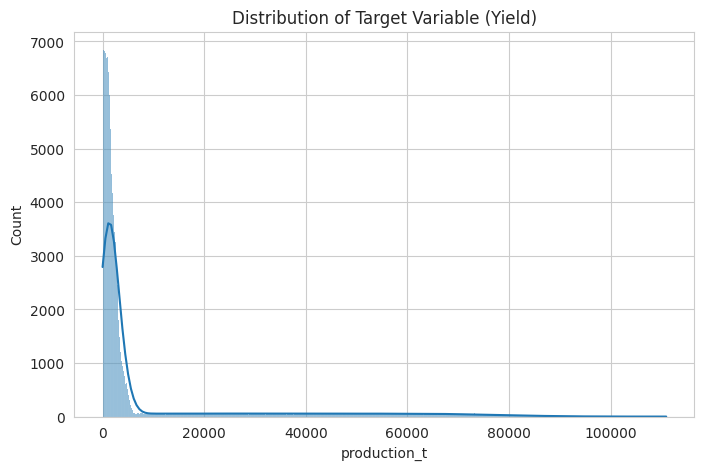


FEATURE CREATION
✅ All features created
New shape: (250000, 21)
✅ Encoded: 'crop'
✅ Encoded: 'region'
✅ Features scaled


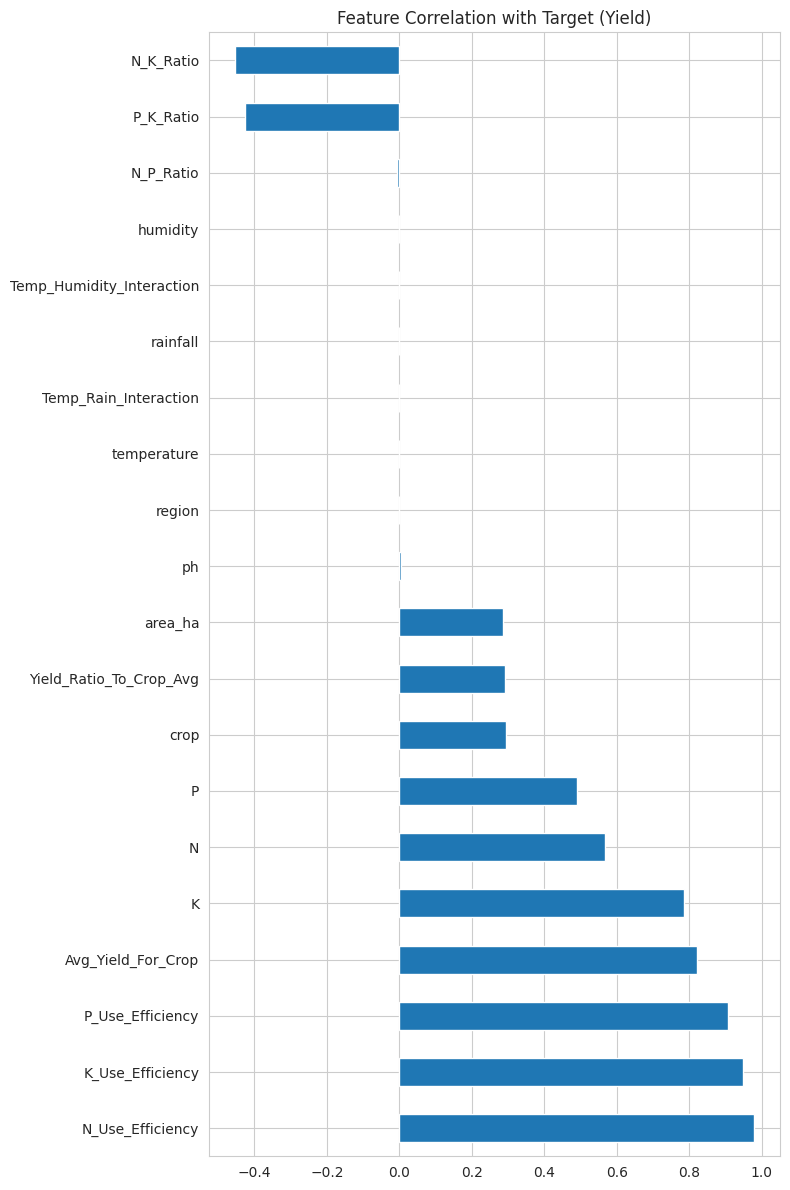

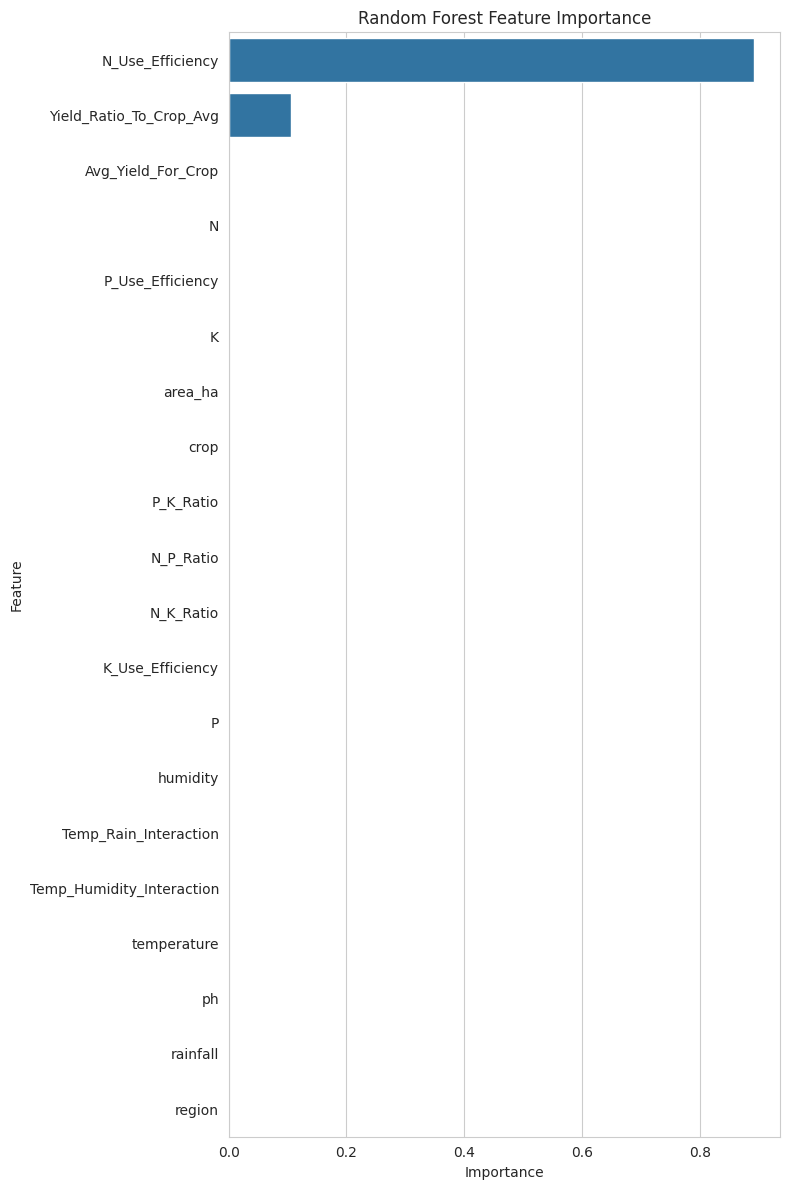


Selected top 12 features:
1. N_Use_Efficiency
2. Yield_Ratio_To_Crop_Avg
3. Avg_Yield_For_Crop
4. N
5. P_Use_Efficiency
6. K
7. area_ha
8. crop
9. P_K_Ratio
10. N_P_Ratio
11. N_K_Ratio
12. K_Use_Efficiency

Final dataset shape: (250000, 13)
✅ Final dataset saved


In [ ]:
# =============================================================================
# FEATURE ENGINEERING: CREATION & SELECTION
# For Crop Yield Prediction Project
# Dataset: Crop Yield Dataset by Sparsh
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

# Set visualisation style
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load dataset
df = pd.read_csv('/content/crop_yeild_dataset.csv')

# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Check unique values
print("\nUnique Crops:", df['crop'].nunique())
# The original code had 'Season' and 'State', which don't exist. I will use 'region' instead of 'State'.
print("Unique Regions:", df['region'].nunique())

# Check target distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['production_t'], kde=True)
plt.title('Distribution of Target Variable (Yield)')
plt.show()

# Feature Creation
print("\n" + "="*50)
print("FEATURE CREATION")
print("="*50)

# Nutrient Use Efficiency Ratios
# The original code had 'Nitrogen', 'Phosphorus', and 'Potassium' which don't exist. I will use 'N', 'P', and 'K'.
df['N_Use_Efficiency'] = df['production_t'] / (df['N'] + 0.001)
df['P_Use_Efficiency'] = df['production_t'] / (df['P'] + 0.001)
df['K_Use_Efficiency'] = df['production_t'] / (df['K'] + 0.001)

# Nutrient Ratios
df['N_P_Ratio'] = df['N'] / (df['P'] + 0.001)
df['N_K_Ratio'] = df['N'] / (df['K'] + 0.001)
df['P_K_Ratio'] = df['P'] / (df['K'] + 0.001)

# Climate Interaction Features
# The original code had 'Temperature' and 'Rainfall' which don't exist. I will use 'temperature' and 'rainfall'.
df['Temp_Rain_Interaction'] = df['temperature'] * df['rainfall']
# The original code had 'Temperature' and 'Humidity' which don't exist. I will use 'temperature' and 'humidity'.
df['Temp_Humidity_Interaction'] = df['temperature'] * df['humidity']

# Crop-Specific Contextual Features
# The original code had 'Crop' which doesn't exist. I will use 'crop'.
# The original code had 'Yield' which doesn't exist. I will use 'production_t'.
df['Avg_Yield_For_Crop'] = df.groupby('crop')['production_t'].transform('mean')
df['Yield_Ratio_To_Crop_Avg'] = df['production_t'] / df['Avg_Yield_For_Crop']

print("✅ All features created")
print(f"New shape: {df.shape}")

# Encode categorical features
# The original code had 'Crop', 'Season', and 'State'. I will use 'crop' and 'region'.
categorical_columns = ['crop', 'region']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"✅ Encoded: '{col}'")

# Feature Scaling
features_to_scale = df.select_dtypes(include=[np.number]).columns.tolist()
# The original code had 'Yield', 'Avg_Yield_For_Crop', 'Yield_Ratio_To_Crop_Avg'. I will use 'production_t', 'Avg_Yield_For_Crop', 'Yield_Ratio_To_Crop_Avg'.
features_to_remove = ['production_t', 'Avg_Yield_For_Crop', 'Yield_Ratio_To_Crop_Avg']
features_to_scale = [f for f in features_to_scale if f not in features_to_remove]

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])
print("✅ Features scaled")

# Feature Selection
# The original code had 'Yield'. I will use 'production_t'.
X = df_scaled.drop('production_t', axis=1)
y = df_scaled['production_t']

# Correlation Analysis
corr_matrix = df_scaled.corr()
# The original code had 'Yield'. I will use 'production_t'.
target_correlation = corr_matrix['production_t'].sort_values(ascending=False)

plt.figure(figsize=(8, 12))
# The original code had 'Yield'. I will use 'production_t'.
target_correlation.drop('production_t').plot(kind='barh')
plt.title('Feature Correlation with Target (Yield)')
plt.tight_layout()
plt.show()

# Random Forest Feature Importance
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X, y)

importances = model_rf.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 12))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

# Select top 12 features
top_k_features = 12
selected_features = feat_imp_df['Feature'].head(top_k_features).tolist()

print(f"\nSelected top {top_k_features} features:")
for i, feat in enumerate(selected_features, 1):
    print(f"{i}. {feat}")

# Create final dataset
X_final = X[selected_features]
final_df = pd.concat([X_final, y], axis=1)

print(f"\nFinal dataset shape: {final_df.shape}")

# Save results
# The original code tried to save the file to a non-existent directory. I will save it to the current directory.
final_df.to_csv('final_engineered_crop_data.csv', index=False)
print("✅ Final dataset saved")